<a href="https://colab.research.google.com/github/Calista-F/CCSN-gravitational-wave-denoising/blob/main/20220201_Lopac_(2020)_Table_15%2C16%2C17_recreations_SIGNAL_96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pywt
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt
import pandas as pd
from math import log10, sqrt
import cv2
import numpy as np

In [70]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, max_error
import math

def get_rmse(y_target, y_computed):
  RMSE = mean_squared_error(y_target, y_computed, squared=False)
  return RMSE

In [71]:
from google.colab import auth
auth.authenticate_user()

import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [72]:
# Load worksheet
repo = gc.open_by_url('https://docs.google.com/spreadsheets/d/1K-OMUgVNvSeW6XgpUMv_CYrDkGWB16cvfpNqqqny8as/edit#gid=423254457')
worksheet = repo.worksheet('CCSN_signal96_dist5.0')

#make a df
CCSN60 = worksheet.get_all_values()
ccsn_df = pd.DataFrame(CCSN60)
ccsn_df.columns = ccsn_df.iloc[0]
ccsn_df = ccsn_df.iloc[1:]

#make numeric
ccsn_df = ccsn_df.apply(pd.to_numeric)

#Test against Lopac 2020


###Table 15. Denoising results for the CCSN signal s20a3o15 (signal 96) at a distance of 5 kpc (SNR = −2.18 dB).

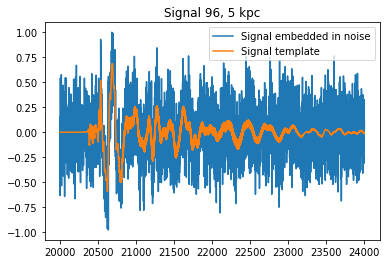

In [73]:
noisy_norm_df = ccsn_df['signal + noise'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])
signal_norm_df = ccsn_df['signal template'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])

plt.plot(noisy_norm_df, label ='Signal embedded in noise')
plt.title('Signal 96, 5 kpc')
plt.plot(signal_norm_df, label ='Signal template')
plt.legend()

Declare necessary lists for table 15

In [74]:
metrics = ['RMSE','MAE','MAX']
wavelets = ['sym4','db25','coif4']
levels = [6,4,5]
methods = ['BayesShrink','VisuShrink']
indexcol = ['RMSE','MAE','MAX']

signalno = 'signal 96'
signaldistance = '5 kpc'

Create a main list that appends each line and each metric result

In [75]:
main_list = []
for m in methods:
  cols = []
  for i in range(len(wavelets)):
    #Make a dataframe for the denoised signal of the noisy normalized signal
    denoised_df = pd.DataFrame(denoise_wavelet(noisy_norm_df, method = m, mode ='hard', wavelet = wavelets[i], wavelet_levels = levels[i], rescale_sigma = 'True'))
    
    #Create col1- a list that contains the signal properties (which signal template was used), denoising properties, and denoising performance metrics
    col1 = [str(m).upper() +', '+ wavelets[i] + ' level ' + str(levels[i])] 
    col1.append(get_rmse(signal_norm_df, denoised_df))
    col1.append(mean_absolute_error(signal_norm_df, denoised_df))
    col1.append(max_error(signal_norm_df, denoised_df))

    #append this column to cols- a list of columns for the table 
    cols.append(col1)
  main_list.append(cols)

FLAG: Loop through **data** dictionary (below)

In [76]:
signalnodistance = signalno+' at '+signaldistance

data = {signalnodistance: metrics,
        #BayesShrink
        main_list[0][0][0]: main_list[0][0][1:], #signal properties to be used as column name
        main_list[0][1][0]: main_list[0][1][1:],
        main_list[0][2][0]: main_list[0][2][1:],

        #VisuShrink
        main_list[1][0][0]: main_list[1][0][1:], #signal properties to be used as column name
        main_list[1][1][0]: main_list[1][1][1:],
        main_list[1][2][0]: main_list[1][2][1:],
        }

# Create DataFrame
Table15_df = pd.DataFrame(data)
 
# Print the output.
Table15_df

,signal 96 at 5 kpc,"BAYESSHRINK, sym4 level 6","BAYESSHRINK, db25 level 4","BAYESSHRINK, coif4 level 5","VISUSHRINK, sym4 level 6","VISUSHRINK, db25 level 4","VISUSHRINK, coif4 level 5"
0,RMSE,0.050983,0.057686,0.050002,0.057256,0.057686,0.050002
1,MAE,0.037445,0.046315,0.037978,0.040164,0.046315,0.037978
2,MAX,0.323642,0.239313,0.250771,0.391702,0.239313,0.250771


###Table 16. Denoising results for the CCSN signal s20a3o15 at a distance of 10 kpc (SNR = −8.17 dB).

In [77]:
# Load worksheet
worksheet = repo.worksheet('CCSN_signal96_dist10.0')

#make a df
CCSN60 = worksheet.get_all_values()
ccsn_df = pd.DataFrame(CCSN60)
ccsn_df.columns = ccsn_df.iloc[0]
ccsn_df = ccsn_df.iloc[1:]

#make numeric
ccsn_df = ccsn_df.apply(pd.to_numeric)

Plot the signal and the template embedded (note the lower peaks due to higher distance --> more noise relatively)

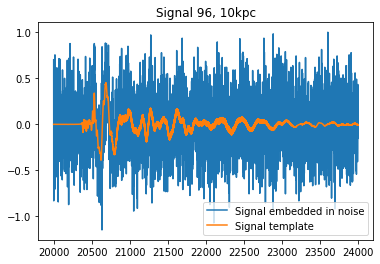

In [78]:
noisy_norm_df = ccsn_df['signal + noise'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])
signal_norm_df = ccsn_df['signal template'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])

plt.plot(noisy_norm_df, label ='Signal embedded in noise')
plt.title('Signal 96, 10kpc')
plt.plot(signal_norm_df, label ='Signal template')
plt.legend()

Declare necessary lists for Table 16

In [79]:
metrics = ['RMSE','MAE','MAX']
wavelets = ['sym8','db4','coif4']
levels = [5, 6,5]
methods = ['BayesShrink','VisuShrink']
indexcol = ['RMSE','MAE','MAX']

signalno = 'signal 96'
signaldistance = '10 kpc'

Create a main list that appends each line and each metric result

In [80]:
main_list = []
for m in methods:
  cols = []
  for i in range(len(wavelets)):
    #Make a dataframe for the denoised signal of the noisy normalized signal
    denoised_df = pd.DataFrame(denoise_wavelet(noisy_norm_df, method = m, mode ='hard', wavelet = wavelets[i], wavelet_levels = levels[i], rescale_sigma = 'True'))
    
    #Create col1- a list that contains the signal properties (which signal template was used), denoising properties, and denoising performance metrics
    col1 = [str(m).upper() +', '+ wavelets[i] + ' level ' + str(levels[i])] 
    col1.append(get_rmse(signal_norm_df, denoised_df))
    col1.append(mean_absolute_error(signal_norm_df, denoised_df))
    col1.append(max_error(signal_norm_df, denoised_df))

    #append this column to cols- a list of columns for the table 
    cols.append(col1)
  main_list.append(cols)

FLAG: Loop through **data** dictionary (below)

In [81]:
signalnodistance = signalno+' at '+signaldistance

data = {signalnodistance: metrics,
        #BayesShrink
        main_list[0][0][0]: main_list[0][0][1:], #signal properties to be used as column name
        main_list[0][1][0]: main_list[0][1][1:],
        main_list[0][2][0]: main_list[0][2][1:],

        #VisuShrink
        main_list[1][0][0]: main_list[1][0][1:], #signal properties to be used as column name
        main_list[1][1][0]: main_list[1][1][1:],
        main_list[1][2][0]: main_list[1][2][1:],
        }

# Create DataFrame
Table16_df = pd.DataFrame(data)
 
# Print the output.
Table16_df

,signal 96 at 10 kpc,"BAYESSHRINK, sym8 level 5","BAYESSHRINK, db4 level 6","BAYESSHRINK, coif4 level 5","VISUSHRINK, sym8 level 5","VISUSHRINK, db4 level 6","VISUSHRINK, coif4 level 5"
0,RMSE,0.052837,0.052044,0.052550,0.052837,0.052866,0.052550
1,MAE,0.041480,0.039471,0.040951,0.041480,0.040143,0.040951
2,MAX,0.183947,0.194638,0.177872,0.183947,0.194638,0.177872


###Table 17. Denoising results for the CCSN signal s20a3o15 at a distance of 20 kpc (SNR = −14.19 dB).

In [82]:
# Load worksheet
worksheet = repo.worksheet('CCSN_signal96_dist20.0')

#make a df
CCSN60 = worksheet.get_all_values()
ccsn_df = pd.DataFrame(CCSN60)
ccsn_df.columns = ccsn_df.iloc[0]
ccsn_df = ccsn_df.iloc[1:]

#make numeric
ccsn_df = ccsn_df.apply(pd.to_numeric)

Plot the signal and the template embedded (note the lower peaks due to higher distance --> more noise relatively)

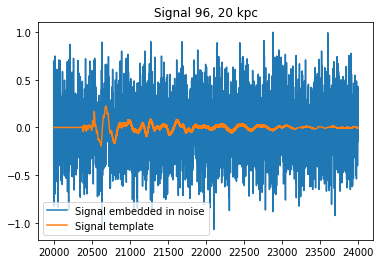

In [83]:
noisy_norm_df = ccsn_df['signal + noise'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])
signal_norm_df = ccsn_df['signal template'].loc[20000:24000]/max(ccsn_df['signal + noise'].loc[20000:24000])

plt.plot(noisy_norm_df, label ='Signal embedded in noise')
plt.title('Signal 96, 20 kpc')
plt.plot(signal_norm_df, label ='Signal template')
plt.legend()

Declare necessary lists for table 17

In [84]:
metrics = ['RMSE','MAE','MAX']
wavelets = ['sym5','db6','coif1']
levels = [6,6,7]
methods = ['BayesShrink','VisuShrink']
indexcol = ['RMSE','MAE','MAX']

signalno = 'signal 96'
signaldistance = '20 kpc'

Create a main list that appends each line and each metric result

In [85]:
main_list = []
for m in methods:
  cols = []
  for i in range(len(wavelets)):
    #Make a dataframe for the denoised signal of the noisy normalized signal
    denoised_df = pd.DataFrame(denoise_wavelet(noisy_norm_df, method = m, mode ='hard', wavelet = wavelets[i], wavelet_levels = levels[i], rescale_sigma = 'True'))
    
    #Create col1- a list that contains the signal properties (which signal template was used), denoising properties, and denoising performance metrics
    col1 = [str(m).upper() +', '+ wavelets[i] + ' level ' + str(levels[i])] 
    col1.append(get_rmse(signal_norm_df, denoised_df))
    col1.append(mean_absolute_error(signal_norm_df, denoised_df))
    col1.append(max_error(signal_norm_df, denoised_df))

    #append this column to cols- a list of columns for the table 
    cols.append(col1)
  main_list.append(cols)

FLAG: Loop through **data** dictionary (below)

In [86]:
signalnodistance = signalno+' at '+signaldistance

data = {signalnodistance: metrics,
        #BayesShrink
        main_list[0][0][0]: main_list[0][0][1:], #signal properties to be used as column name
        main_list[0][1][0]: main_list[0][1][1:],
        main_list[0][2][0]: main_list[0][2][1:],

        #VisuShrink
        main_list[1][0][0]: main_list[1][0][1:], #signal properties to be used as column name
        main_list[1][1][0]: main_list[1][1][1:],
        main_list[1][2][0]: main_list[1][2][1:],
        }

# Create DataFrame
Table17_df = pd.DataFrame(data)
 
# Print the output.
Table17_df

,signal 96 at 20 kpc,"BAYESSHRINK, sym5 level 6","BAYESSHRINK, db6 level 6","BAYESSHRINK, coif1 level 7","VISUSHRINK, sym5 level 6","VISUSHRINK, db6 level 6","VISUSHRINK, coif1 level 7"
0,RMSE,0.040086,0.039795,0.041019,0.040086,0.039795,0.038326
1,MAE,0.030498,0.030574,0.030275,0.030498,0.030574,0.027176
2,MAX,0.173882,0.164350,0.159082,0.173882,0.164350,0.193136


======================================================================================================

NEXT STEPS:

1. Make a function just gives the table after inputting the signal, distance, and denoising properties
2. Loop through all denoising properties to find the best ones
3. Loop through the table-making (flagged)

*denoising properties-wavelet and level

======================================================================================================